In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/PCA_50_features new.csv")
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,result
29366,-2.132084,4.309147,-4.304544,-6.068978,2.806751,2.408787,-0.765691,-1.750159,1.236261,0.047750,...,0.418673,0.223992,-0.671080,0.174298,-0.933442,-0.595131,0.011499,-0.241829,0.575417,0
23615,-1.780374,-1.265708,-1.076752,1.432798,-2.496938,0.239494,-1.887028,-1.405908,1.488426,0.835950,...,0.268630,0.438935,0.332967,-0.017062,0.622107,0.357133,0.329133,0.426193,0.488793,0
22229,-3.101651,-1.426756,0.952055,0.148769,2.035272,-3.884238,0.685677,-1.497856,-0.018116,0.661257,...,0.483539,-0.284198,-0.779277,-0.223326,-0.001536,0.259600,0.235076,0.268252,0.232775,0
25034,-4.682691,-0.987065,0.265389,-0.477354,-0.067266,-1.643923,-0.102450,-0.250178,0.050376,0.236073,...,0.358058,0.356341,0.667958,0.306028,-0.242856,-0.369223,-0.126931,-0.023303,-0.390637,0
38893,5.510855,-1.904306,1.525668,1.115010,-4.280530,-1.642448,-3.352297,2.021591,4.131455,-0.202038,...,-0.702460,0.973670,0.196433,0.568177,0.845680,0.158302,0.264057,0.075852,0.017040,0


In [4]:
df.result.value_counts()

0    42209
1     5667
Name: result, dtype: int64

In [5]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 3.6 MB/s 


In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow_addons import losses

In [9]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
X.shape,y.shape

((47876, 50), (47876,))

In [11]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (33513, 50)
Number transactions y_train dataset:  (33513,)
Number transactions X_test dataset:  (14363, 50)
Number transactions y_test dataset:  (14363,)


In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3975
Before OverSampling, counts of label '0': 29538 

After OverSampling, the shape of train_X: (59076, 50)
After OverSampling, the shape of train_y: (59076,) 

After OverSampling, counts of label '1': 29538
After OverSampling, counts of label '0': 29538


In [15]:
X_test.shape,y_test.shape

((14363, 50), (14363,))

Artificial neural Network

In [16]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=50, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [17]:
y_preds = ANN(X_train_res, y_train_res, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
1847/1847 [==============================] - 5s 2ms/step - loss: 0.4644 - accuracy: 0.7814
Epoch 2/100
1847/1847 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.8413
Epoch 3/100
1847/1847 [==============================] - 4s 2ms/step - loss: 0.3197 - accuracy: 0.8620
Epoch 4/100
1847/1847 [==============================] - 5s 2ms/step - loss: 0.2982 - accuracy: 0.8739
Epoch 5/100
1847/1847 [==============================] - 4s 2ms/step - loss: 0.2845 - accuracy: 0.8803
Epoch 6/100
1847/1847 [==============================] - 4s 2ms/step - loss: 0.2744 - accuracy: 0.8852
Epoch 7/100
1847/1847 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.8897
Epoch 8/100
1847/1847 [==============================] - 5s 2ms/step - loss: 0.2594 - accuracy: 0.8918
Epoch 9/100
1847/1847 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.8967
Epoch 10/100
1847/1847 [==============================] - 4s 2ms/step - l

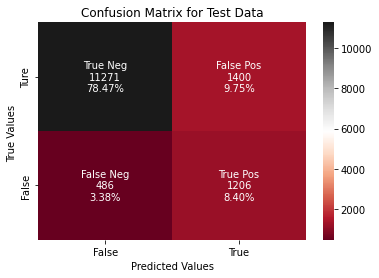

In [18]:

cf_matrix = confusion_matrix(y_test, y_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

XGBOOST MODEL

In [22]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_res, y_train_res)

print_score(xgb_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(xgb_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.03%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.843363      0.818232   0.83032      0.830798      0.830798
recall         0.811328      0.849313   0.83032      0.830320      0.830320
f1-score       0.827035      0.833483   0.83032      0.830259      0.830259
support    29538.000000  29538.000000   0.83032  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[23965  5573]
 [ 4451 25087]]

Test Result:
Accuracy Score: 78.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.960134     0.324847  0.786396      0.642491      0.885296
recall         0.790703     0.754137  0.786396      0.772420      0.786396
f1-score       0.867221     0.454093  0.786396      0.660657      0.818553
suppo

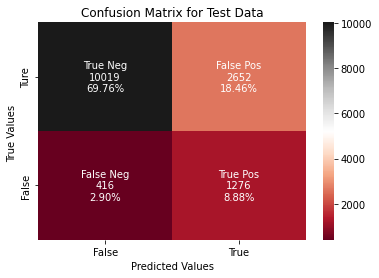

In [23]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8505148154802584

LGBM MODEL

In [25]:
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train_res, y_train_res)

print_score(lgbmc_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.11%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.923010      0.899806  0.911081      0.911408      0.911408
recall         0.896980      0.925181  0.911081      0.911081      0.911081
f1-score       0.909809      0.912317  0.911081      0.911063      0.911063
support    29538.000000  29538.000000  0.911081  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26495  3043]
 [ 2210 27328]]

Test Result:
Accuracy Score: 85.34%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.961152     0.428817  0.853373      0.694985      0.898442
recall         0.868913     0.736998  0.853373      0.802955      0.853373
f1-score       0.912708     0.542174  0.853373      0.727441      0.869058
suppo

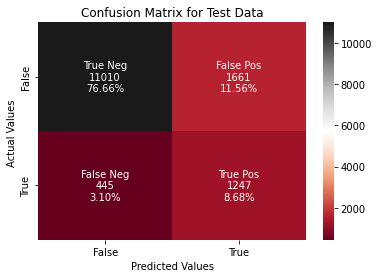

In [26]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8910685743380438

SUPPORT VECTOR METHOD

In [29]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train_res, y_train_res)

print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.25%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.948340      0.899488  0.922507      0.923914      0.923914
recall         0.893696      0.951317  0.922507      0.922507      0.922507
f1-score       0.920208      0.924677  0.922507      0.922442      0.922442
support    29538.000000  29538.000000  0.922507  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26398  3140]
 [ 1438 28100]]

Test Result:
Accuracy Score: 85.37%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.962134     0.429986  0.853652      0.696060      0.899445
recall         0.868282     0.744090  0.853652      0.806186      0.853652
f1-score       0.912802     0.545022  0.853652      0.728912      0.869476
suppo

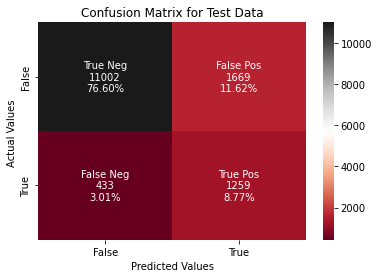

In [30]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8903753624413299

KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train_res, y_train_res)

print_score(knn_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(knn_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.959724      0.767396  0.838124      0.863560      0.863560
recall         0.705870      0.970377  0.838124      0.838124      0.838124
f1-score       0.813452      0.857032  0.838124      0.835242      0.835242
support    29538.000000  29538.000000  0.838124  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[20850  8688]
 [  875 28663]]

Test Result:
Accuracy Score: 70.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.974649     0.269090  0.707025      0.621870      0.891533
recall         0.685739     0.866430  0.707025      0.776085      0.707025
f1-score       0.805059     0.410644  0.707025      0.607852      0.758596
suppo

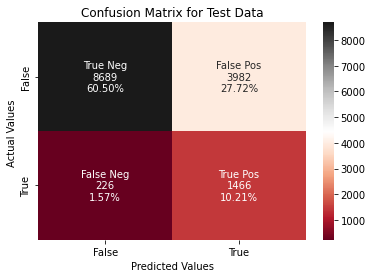

In [33]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8836791416822128

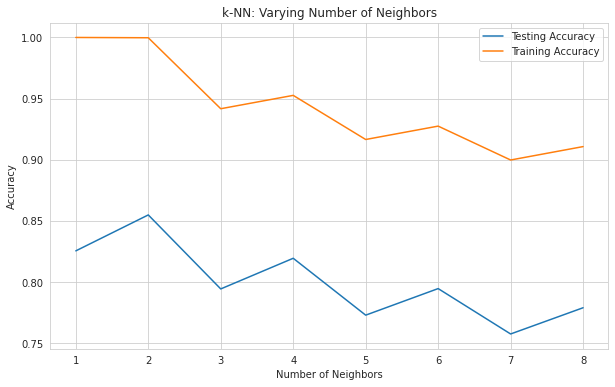

In [36]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train_res, y_train_res)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train_res, y_train_res)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

GRADIENT BOOSTING CLASSIFER

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train_res, y_train_res)

print_score(gb_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(gb_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.35%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.843709      0.823821  0.833469      0.833765      0.833765
recall         0.818573      0.848365  0.833469      0.833469      0.833469
f1-score       0.830951      0.835913  0.833469      0.833432      0.833432
support    29538.000000  29538.000000  0.833469  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[24179  5359]
 [ 4479 25059]]

Test Result:
Accuracy Score: 79.20%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.959916     0.331160  0.792035      0.645538      0.885847
recall         0.797569     0.750591  0.792035      0.774080      0.792035
f1-score       0.871244     0.459562  0.792035      0.665403      0.822747
suppo

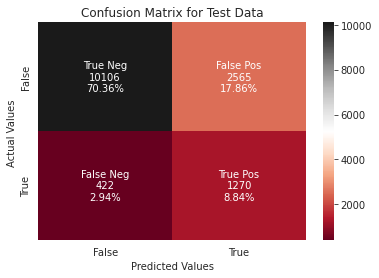

In [39]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8501629621669183